In [173]:
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import os
import numpy as np
import KLZFitPy as KF
import importlib
import glob, sys, pylab,  matplotlib, time, scipy.optimize, math,pickle
import json
import scipy.stats
from matplotlib.colors import LogNorm
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

importlib.reload(KF)
# Setup some constants for the analysis
dataPaths             = KF.DataPaths('')      # set paths to look for information, like cross section tables. No data imported yet.
dataPaths.pdfLocation = '/Users/HAL9000/Dropbox (MIT)/KamLAND/Analyses/KamLAND-LIGO/Figures/'
Const                 = KF.Constants()        # Setup the physical constants, like average neutrino mass
Const.setSeed(7)                         # Set a seed for the random number generator, like generating random time stamps on the neutrinos.
Const.NeutrinoEmissionRange = [-500,500] 
Const.LiveTime    = 3600*24               #  Set the analysis livetime

FitParameters     = KF.FitParameters()    # Setup the default systematic uncertainties.

KLZFit            = KF.KLZFit(dataPaths,Const,FitParameters) # make an object


Average Neutrino Energy in sample: 4.75MeV
/Users/HAL9000/Dropbox (MIT)/KamLAND/Analyses/KamLAND-LIGO/Figures/plotNeutrinoPDF.pdf


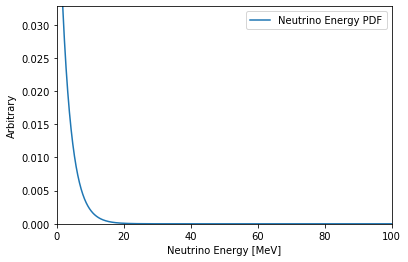

Time and energy for neutrino event 0:
43296.80806021863 2.0196920982071505


In [174]:
# Let's make a fake neutrino energy distribution. Estimate it as an exponential.
neutrinopdf = np.exp(-KLZFit.Constants.NeutrinoCenterEnergies/3.) 
KLZFit.setNeutrinoEnergyPDF(neutrinopdf)
KLZFit.plotNeutrinoEnergyPDF(log = False)

realization = KLZFit.getNeutrinoRealization(Rate = 4/KLZFit.Constants.LiveTime)  # Rate is the expected neutrino rate. 
KLZFit.setNeutrinos(realization)    # Set the realization as the data, [time, energy, -, +]
print('Time and energy for neutrino event 0:')
print(KLZFit.Neutrinos.Time[0],KLZFit.Neutrinos.Energy[0])


Gravitational waves time and distance:
[32913.31390403  5696.90037267 24895.77978021 78588.88079497] [ 440. 1080.  650. 2840.]
/Users/HAL9000/Dropbox (MIT)/KamLAND/Analyses/KamLAND-LIGO/Figures//plotAllEvents.pdf


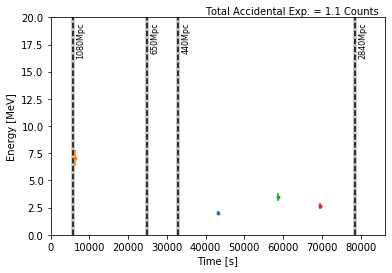

/Users/HAL9000/Dropbox (MIT)/KamLAND/Analyses/KamLAND-LIGO/Figures/TOF.pdf


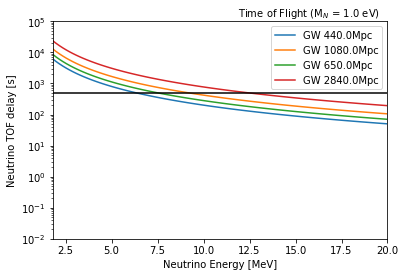

In [175]:
# Generate some GravitationalWaves, randomly assiging a time stamp. [time, distnace, -, +]
gravitationalWaves = np.asarray([
                    ['GW150914',np.random.uniform(low=0, high=KLZFit.Constants.LiveTime, size=(1,))[0],440,-170,150,],
                    ['GW151012',np.random.uniform(low=0, high=KLZFit.Constants.LiveTime, size=(1,))[0],1080,-490,550],
                    ['GW151226',np.random.uniform(low=0, high=KLZFit.Constants.LiveTime, size=(1,))[0],650,-190,180],
                    ['GW170104',np.random.uniform(low=0, high=KLZFit.Constants.LiveTime, size=(1,))[0],2840,-1360,1400],
                    ])

KLZFit.setGravitationalWaves(gravitationalWaves) # set the GW
print('Gravitational waves time and distance:')
print(KLZFit.GravitationalWaves.Time,KLZFit.GravitationalWaves.Distance)

# Make a plot of the GW event times and neutrino times with energies.
KLZFit.plotAllEvents(plot_GW = True)

# Make a plot of the time of flight widows for all GWs
#KLZFit.plotTOF(Mn = 0.02) # Lower limit on neutrino mass
KLZFit.plotTOF(Mn = KLZFit.Constants.neutrinoMass) # Upper limit on neutrino mass

def neutrinoTimeOfFlight(distance_Mpc,Energy_MeV):
    mn = KLZFit.Constants.neutrinoMass
    H0 = KLZFit.Constants.H0 * 1000/(3.08568e22)
    Ol = KLZFit.Constants.OmegaLambda
    Om = KLZFit.Constants.OmegaMatter
    c  =  KLZFit.Constants.c
    v  = H0 *distance_Mpc * 3.08568e22; 
    z  = v/c
    E  = Energy_MeV*1e6
    const = mn**2/(2*H0*E**2)
    def func(x):
        return const * 1./((1+x)**2 * np.sqrt(Ol+Om*(1+x)**3))
    return quad(func, 0., z)[0]



/Users/HAL9000/Dropbox (MIT)/KamLAND/Analyses/KamLAND-LIGO/Figures//plotInterestingEvents_GW151012.pdf


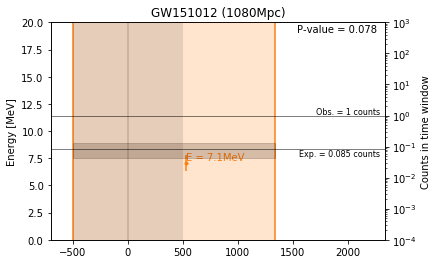

10538.311846882902


In [177]:
# Determine the time windows for the search
KLZFit.calculateTimeRange(FitParameters) # Given the distance to GWs and the neutrion energies, calculate the time windows.
# If any neutrino events fall inside the time window, plot them.
KLZFit.plotInterestingEvents(axis2 = True)

print(neutrinoTimeOfFlight(1080, 2.0))

/Users/HAL9000/Dropbox (MIT)/KamLAND/Analyses/KamLAND-LIGO/Figures//calcFeldmanCousins_GW150914.pdf


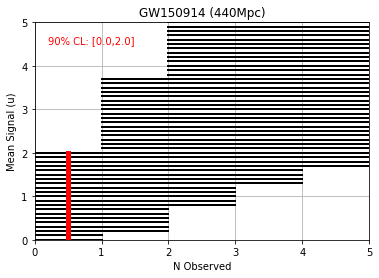

/Users/HAL9000/Dropbox (MIT)/KamLAND/Analyses/KamLAND-LIGO/Figures//calcFeldmanCousins_GW151012.pdf


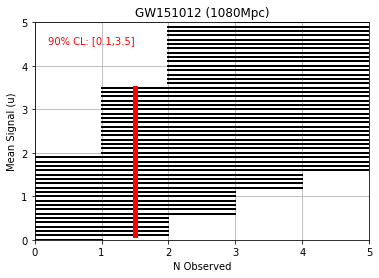

/Users/HAL9000/Dropbox (MIT)/KamLAND/Analyses/KamLAND-LIGO/Figures//calcFeldmanCousins_GW151226.pdf


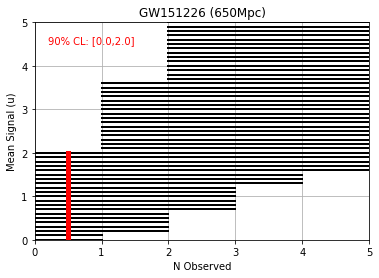

/Users/HAL9000/Dropbox (MIT)/KamLAND/Analyses/KamLAND-LIGO/Figures//calcFeldmanCousins_GW170104.pdf


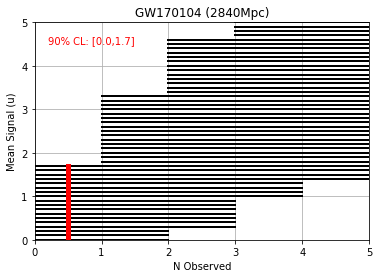

In [123]:
# Spit out the FeldmanCousins range of allowed signal.
# THis calcaulation comes from https://arxiv.org/pdf/physics/9711021.pdf, Figure 7.
# This calcualtes the upper and lower limits of the range of signal compatible with the observed number of events for a GW.
KLZFit.calcFeldmanCousins(plot = True,confidenceLevel=0.90) # This takes ~5s per GW to calculate.

l_limits = KLZFit.FCLowerLimits
u_limits = KLZFit.FCUpperLimits


/Users/HAL9000/Dropbox (MIT)/KamLAND/Analyses/KamLAND-LIGO/Figures/calcFluence.pdf


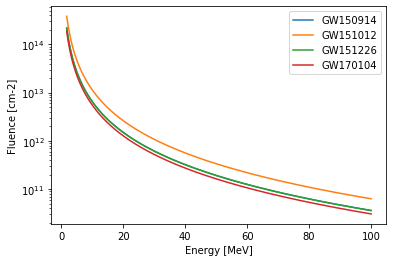

In [124]:
# Once you have the confidence limits from the FeldmanCousins calculation. Convert to a fluence limit.

KLZFit.calcFluence()
# This is a function of:
#    Detection efficiency (from Joe)
#    Number of target protons (from Joe)
#    Neutrino energy spectrum 
#    IBD cross section (Jamie)

# We actually don't really care about the fluence. Fluence is the total number of neutrinos passing throug the detector. 
# But, it says nothing about the source.


In [116]:
# TODO:
# Convert fluence to a flux limit from the source. That is, scale by the 4pi r^2.
# Go through other papers. Reproduce calculations and plots.
# Separate GW by sources. BH-BH, NS-NS, BH-NS, SuperNova


In [118]:
# Some LLH calculation?
KLZFit.evalLLH()